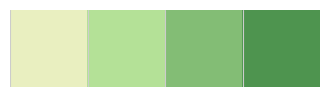

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.express import scatter
import seaborn as sns
import numpy as np


import warnings
warnings.filterwarnings('ignore')

colors_nude = ['#E9EFC0','#B4E197','#83BD75','#4E944F'] #if wandring why greens ?to reinforce the emotion (prediction dollar$)
sns.palplot(sns.color_palette(colors_nude))


# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

# see this if allowed  
from sklearn.model_selection import GridSearchCV , learning_curve

In [44]:
df=pd.read_csv('Carbon Emission.csv')

In [45]:
print("The shape of our dataset is ",df.shape)
print()
print()
print("The column names and unique values in each column of the dataset are :",)
print()

print(df.nunique())


The shape of our dataset is  (10000, 20)


The column names and unique values in each column of the dataset are :

Body Type                           4
Sex                                 2
Diet                                4
How Often Shower                    4
Heating Energy Source               4
Transport                           3
Vehicle Type                        5
Social Activity                     3
Monthly Grocery Bill              250
Frequency of Traveling by Air       4
Vehicle Monthly Distance Km      4003
Waste Bag Size                      4
Waste Bag Weekly Count              7
How Long TV PC Daily Hour          25
How Many New Clothes Monthly       51
How Long Internet Daily Hour       25
Energy efficiency                   3
Recycling                          16
Cooking_With                       16
CarbonEmission                   3509
dtype: int64


In [46]:
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [47]:
df.isna().sum()

Body Type                           0
Sex                                 0
Diet                                0
How Often Shower                    0
Heating Energy Source               0
Transport                           0
Vehicle Type                     6721
Social Activity                     0
Monthly Grocery Bill                0
Frequency of Traveling by Air       0
Vehicle Monthly Distance Km         0
Waste Bag Size                      0
Waste Bag Weekly Count              0
How Long TV PC Daily Hour           0
How Many New Clothes Monthly        0
How Long Internet Daily Hour        0
Energy efficiency                   0
Recycling                           0
Cooking_With                        0
CarbonEmission                      0
dtype: int64

Because the Vehcile Type column has empty entries we assume that the person does not own any vehicle 

In [48]:
df['Vehicle Type']=df['Vehicle Type'].fillna('No Vehicle')


Now let us see if some person own a vehcile but have left it

We check this by if a person use private mode of transport but has left it means he/she owns a vehcile

In [49]:
df[(df['Transport'] == 'private') & (df['Vehicle Type'] == 'No Vehicle')].shape[0]

0

It means people have filled it correctly

We will now check if we have duplicated rows

In [50]:
df.duplicated().sum()


0

In [51]:
df.dtypes

Body Type                        object
Sex                              object
Diet                             object
How Often Shower                 object
Heating Energy Source            object
Transport                        object
Vehicle Type                     object
Social Activity                  object
Monthly Grocery Bill              int64
Frequency of Traveling by Air    object
Vehicle Monthly Distance Km       int64
Waste Bag Size                   object
Waste Bag Weekly Count            int64
How Long TV PC Daily Hour         int64
How Many New Clothes Monthly      int64
How Long Internet Daily Hour      int64
Energy efficiency                object
Recycling                        object
Cooking_With                     object
CarbonEmission                    int64
dtype: object

No duplicate rows 

## Univariate Analysis

In [52]:
df.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


We can see  mean and median for almost all features are equal except for Vehicle Monthly Distance Km which is due to some people (67%) not having vehicle to drive


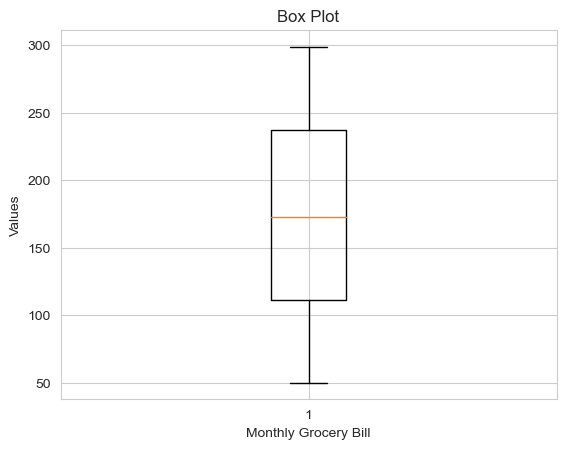

Outliers:
0


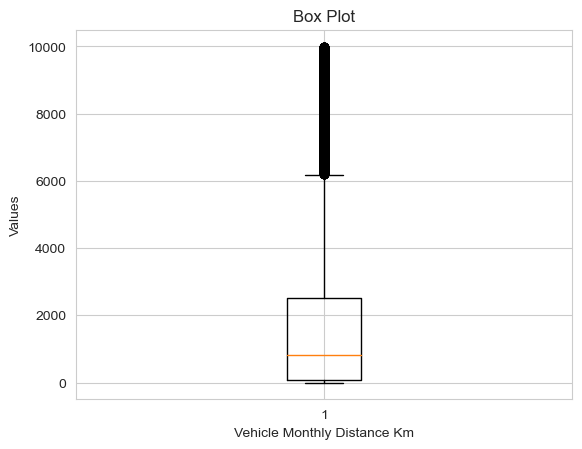

Outliers:
1294


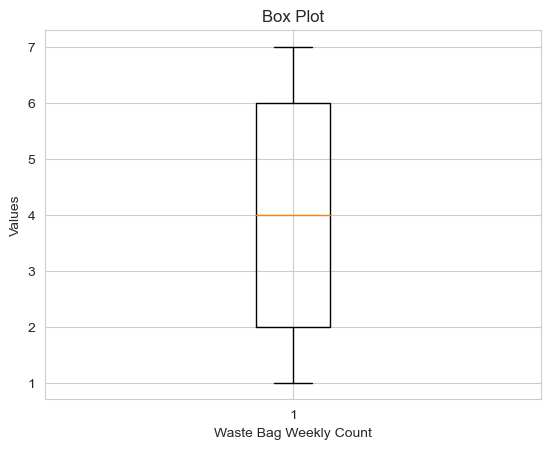

Outliers:
0


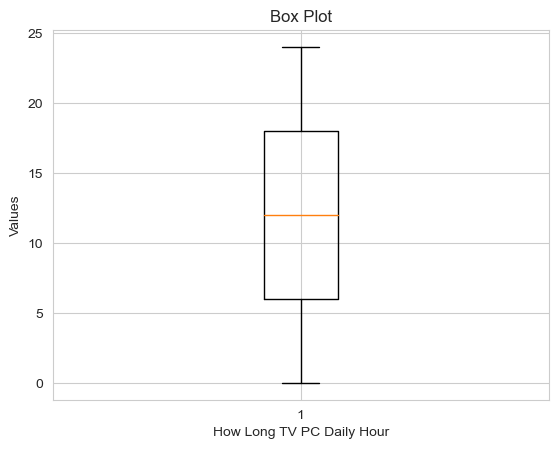

Outliers:
0


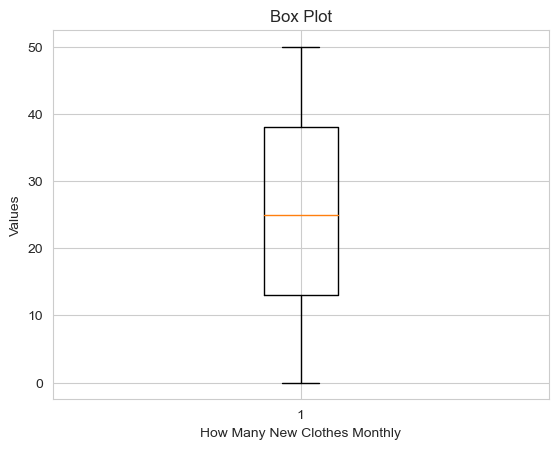

Outliers:
0


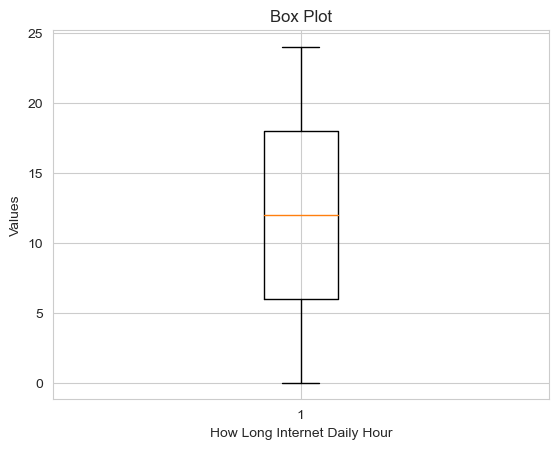

Outliers:
0


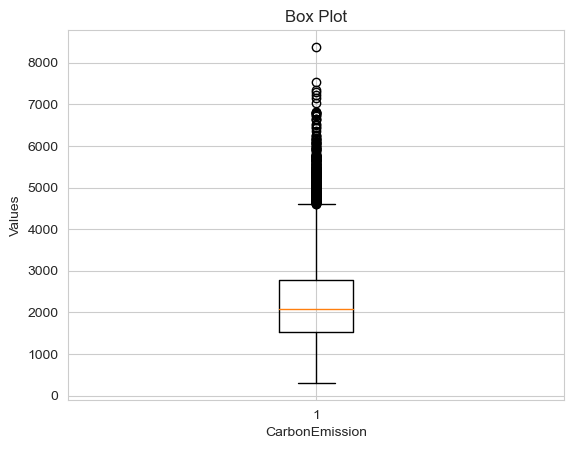

Outliers:
346


In [53]:
for column_name in df.columns[df.dtypes == 'int64']:
    plt.boxplot(df[column_name])
    plt.title('Box Plot')
    plt.xlabel(column_name)
    plt.ylabel('Values')
    plt.show()

    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print("Outliers:")
    print(outliers.shape[0])

From these plots we can say outlier are for Distance travelled and rest don't have outliers

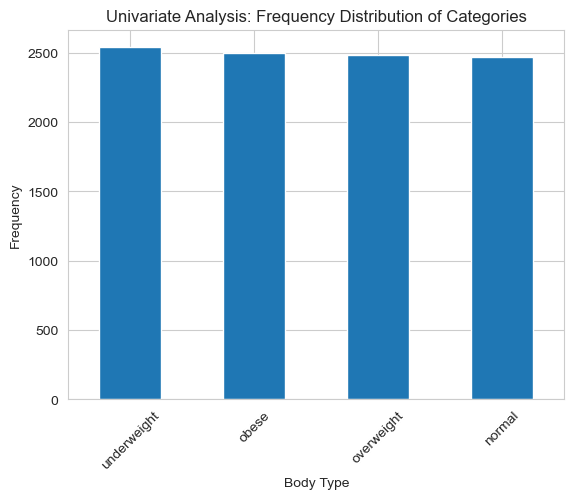

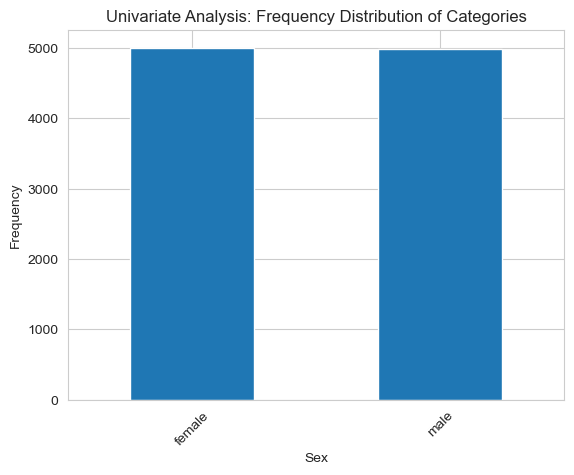

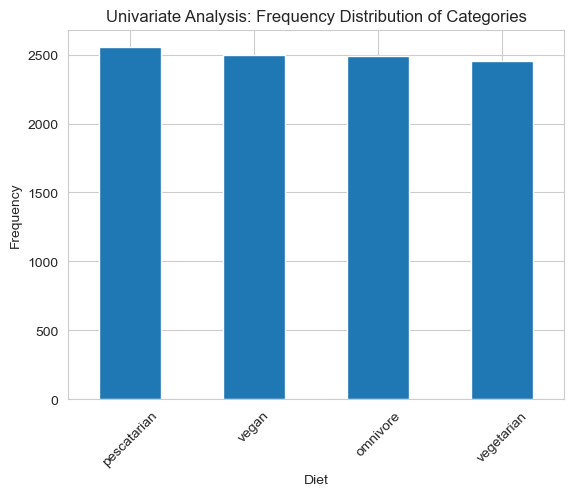

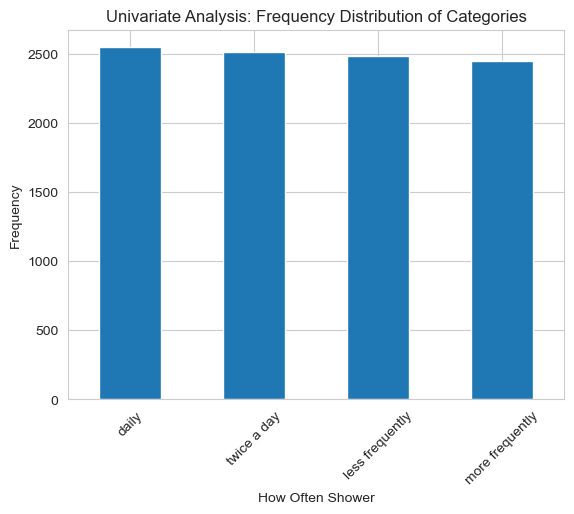

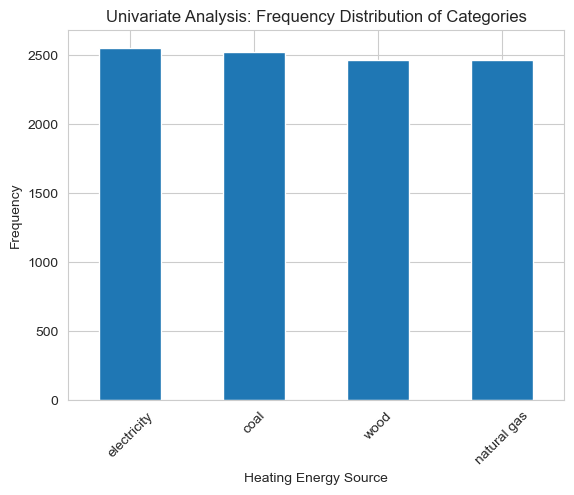

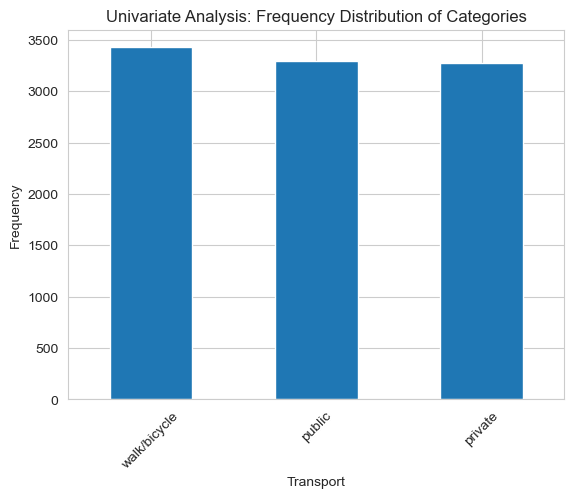

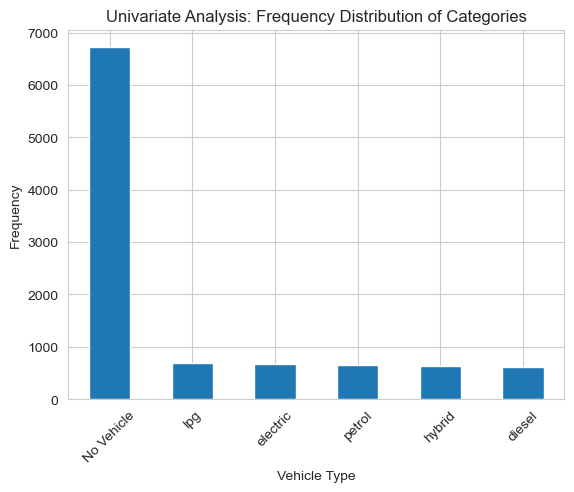

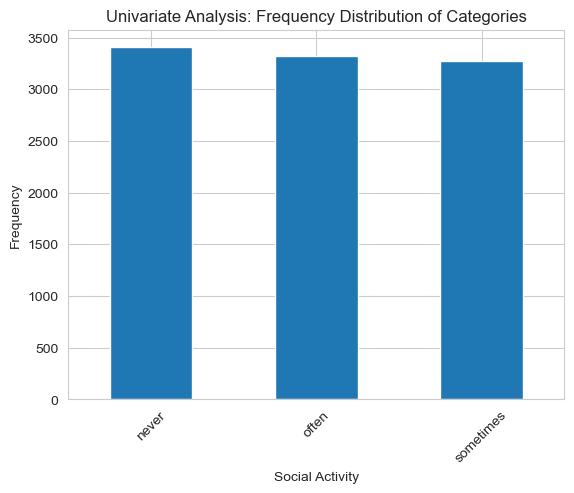

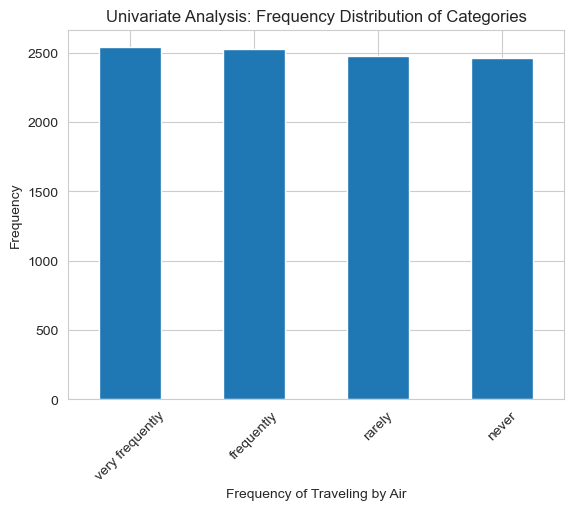

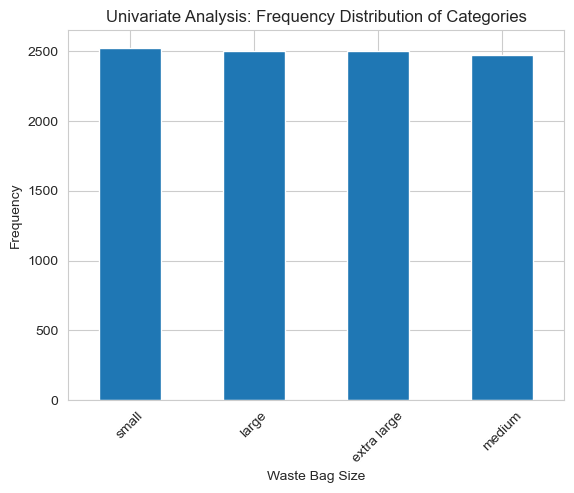

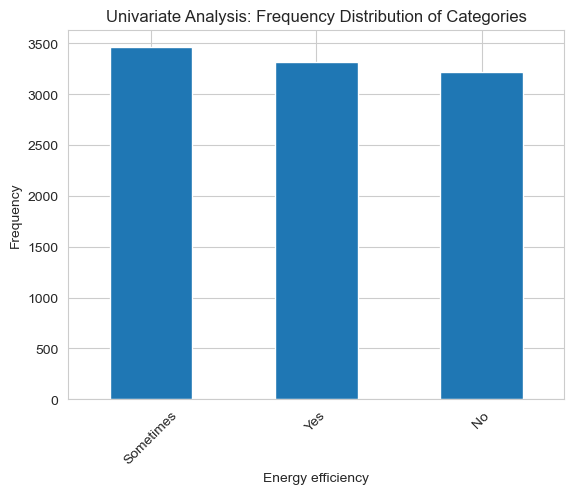

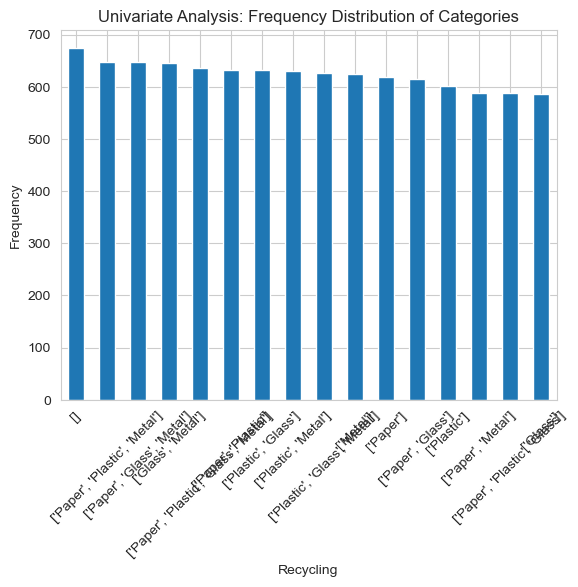

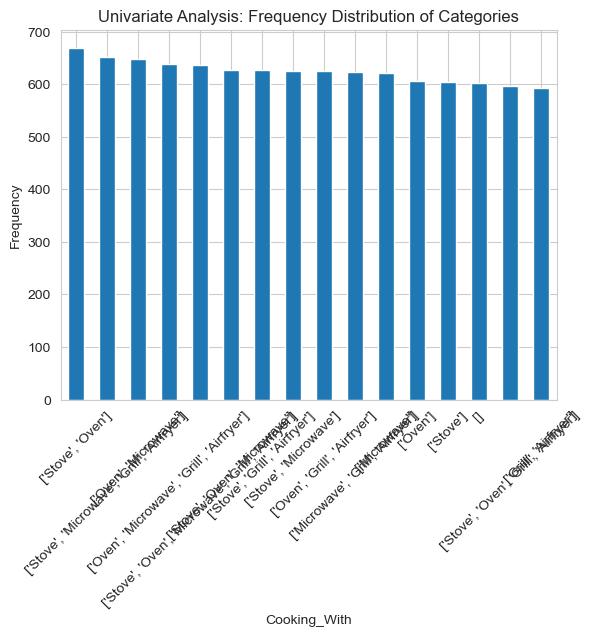

In [54]:

for col in df.columns[df.dtypes == 'object']:

    category_counts = df[col].value_counts()

    # Create bar plot for univariate analysis
    category_counts.plot(kind='bar')
    plt.title('Univariate Analysis: Frequency Distribution of Categories')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

From these plots we can say that data is well distributed with every category have almost equal share in total data

In [55]:
# df2 = df[df['Vehicle Type'] == 'No Vehicle']
# df2.describe()['Vehicle Monthly Distance Km']
# for column_name in df2.columns[df.dtypes == 'int64']:
#     plt.boxplot(df2[column_name])
#     plt.title('Box Plot')
#     plt.xlabel(column_name)
#     plt.ylabel('Values')
#     plt.show()

#     # Calculate the first quartile (Q1) and third quartile (Q3)
#     Q1 = df2[column_name].quantile(0.25)
#     Q3 = df[column_name].quantile(0.75)

#     # Calculate the interquartile range (IQR)
#     IQR = Q3 - Q1

#     # Define the lower and upper bounds for outliers
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Detect outliers
#     outliers = df2[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
#     print("Outliers:")
#     print(outliers.shape[0])

In [56]:
# df2 = df[df['Vehicle Type'] != 'No Vehicle']
# df2.describe()
# for column_name in df2.columns[df.dtypes == 'int64']:
#     plt.boxplot(df2[column_name])
#     plt.title('Box Plot')
#     plt.xlabel(column_name)
#     plt.ylabel('Values')
#     plt.show()

#     # Calculate the first quartile (Q1) and third quartile (Q3)
#     Q1 = df2[column_name].quantile(0.25)
#     Q3 = df[column_name].quantile(0.75)

#     # Calculate the interquartile range (IQR)
#     IQR = Q3 - Q1

#     # Define the lower and upper bounds for outliers
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Detect outliers
#     outliers = df2[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
#     print("Outliers:")
#     print(outliers.shape[0])

## Bivariate Analysis

Let us try to see a basic corelation of the initial data with each other

In [57]:
df.corr()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
Monthly Grocery Bill,1.000000,0.015801,0.002343,-0.010318,0.006746,0.012798,0.081587
Vehicle Monthly Distance Km,0.015801,1.000000,-0.001730,-0.003943,0.004934,-0.003497,0.594171
Waste Bag Weekly Count,0.002343,-0.001730,1.000000,-0.011640,-0.003254,-0.005335,0.159193
How Long TV PC Daily Hour,-0.010318,-0.003943,-0.011640,1.000000,0.009414,0.006804,0.012985
How Many New Clothes Monthly,0.006746,0.004934,-0.003254,0.009414,1.000000,0.006426,0.198887
How Long Internet Daily Hour,0.012798,-0.003497,-0.005335,0.006804,0.006426,1.000000,0.043878
CarbonEmission,0.081587,0.594171,0.159193,0.012985,0.198887,0.043878,1.000000


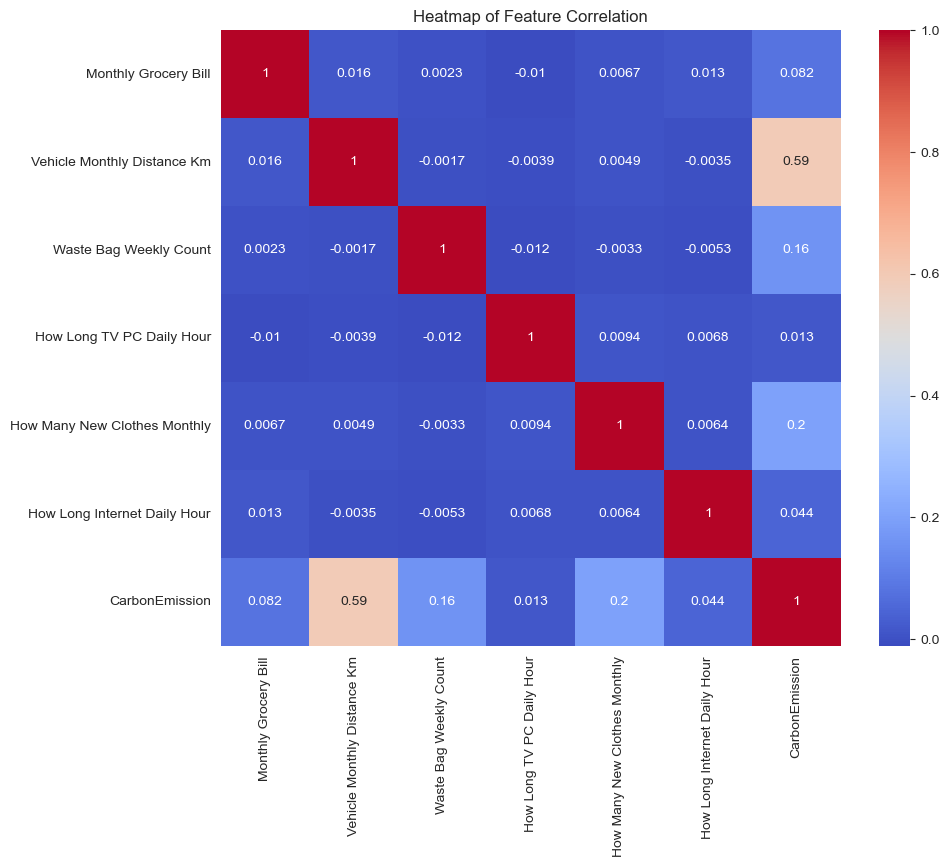

In [58]:
# Calculate correlations
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Heatmap of Feature Correlation')
plt.show()

It only shows corelation of numerical datatypes with each other
Thus we can see Monthly Distance Driven affects carbon emission a lot along with Waste Bag Weekly Count

Now we have seen the relationship of numerical data with Carbon Emission
Now let us see the relationship of categorical data

In [59]:
# we remove the numerical datatype columns
categorical_columns = list(df.columns[df.dtypes == 'object'])
# print(li)

In [60]:
# we remove  these 2 columns as they have list which contains what type of things they do
#  we will evaulate these in the end
categorical_columns.remove('Recycling')
categorical_columns.remove('Cooking_With')
print(categorical_columns)


['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source', 'Transport', 'Vehicle Type', 'Social Activity', 'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency']


<Figure size 1000x2000 with 0 Axes>

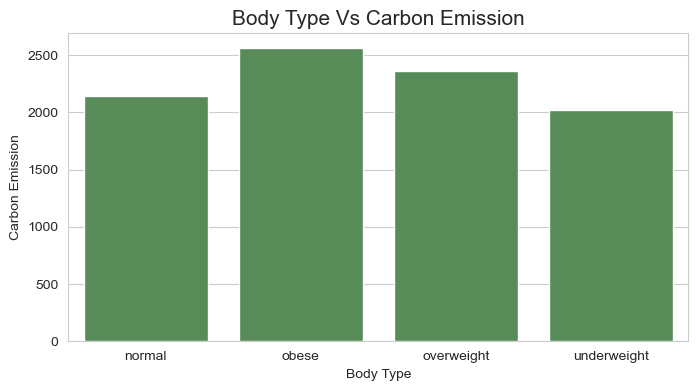

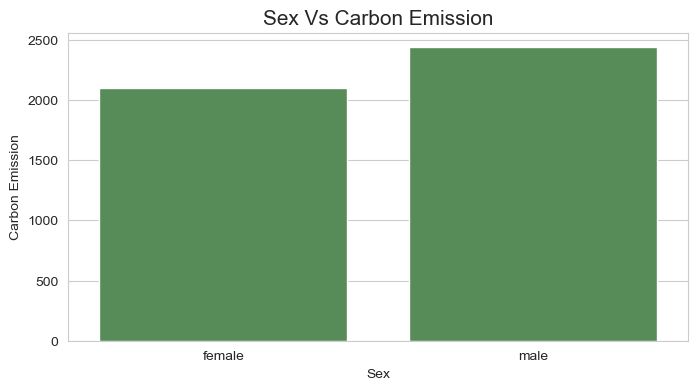

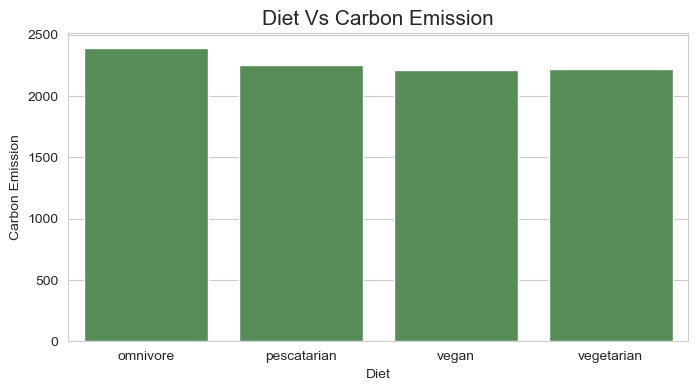

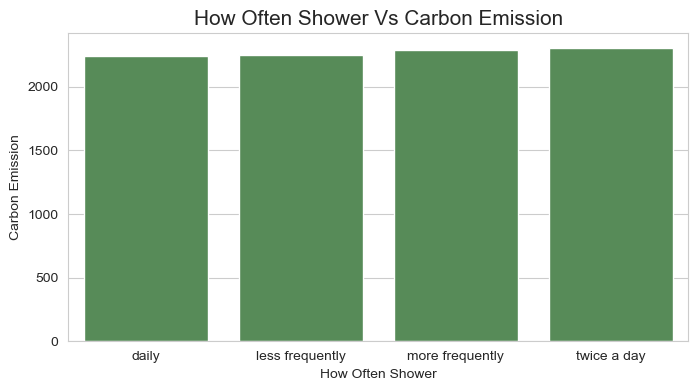

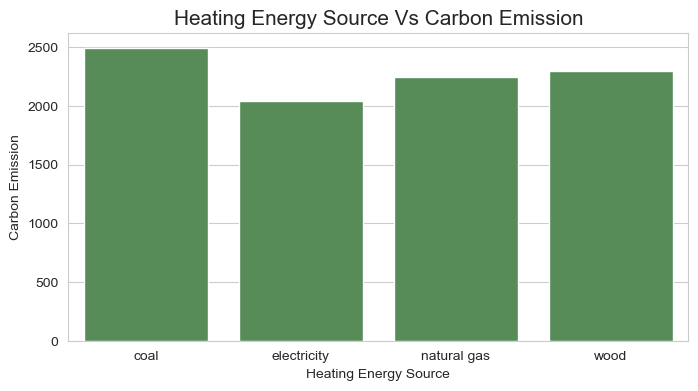

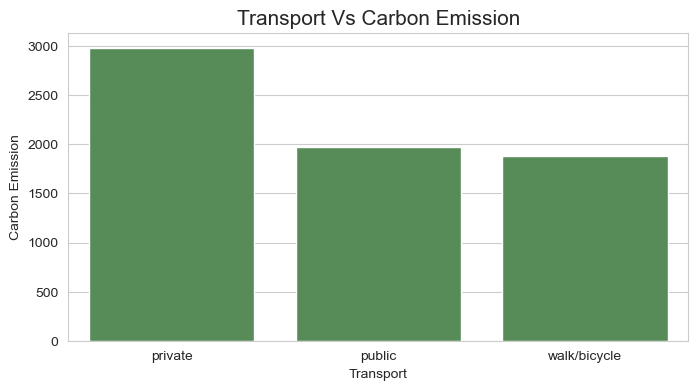

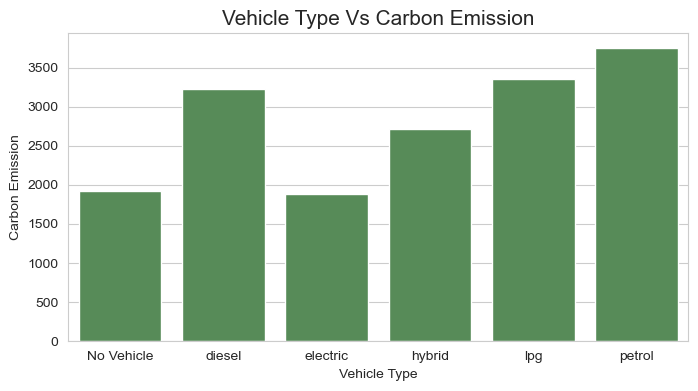

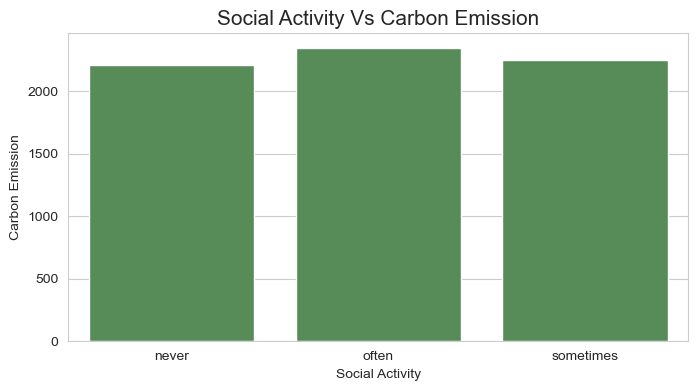

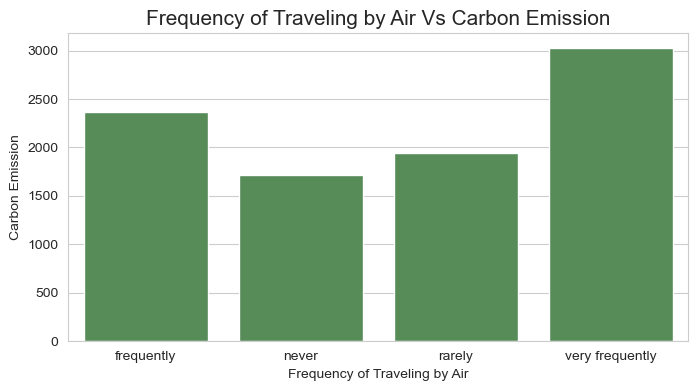

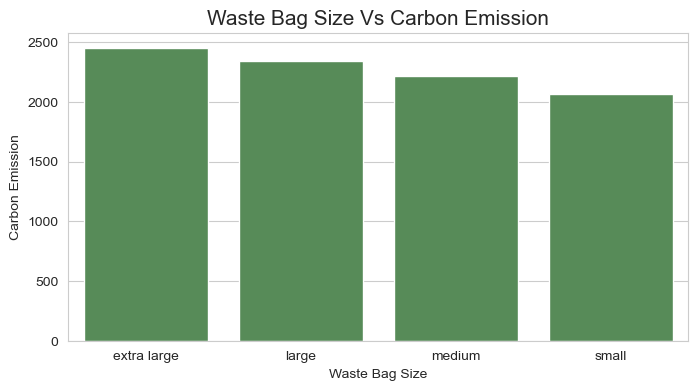

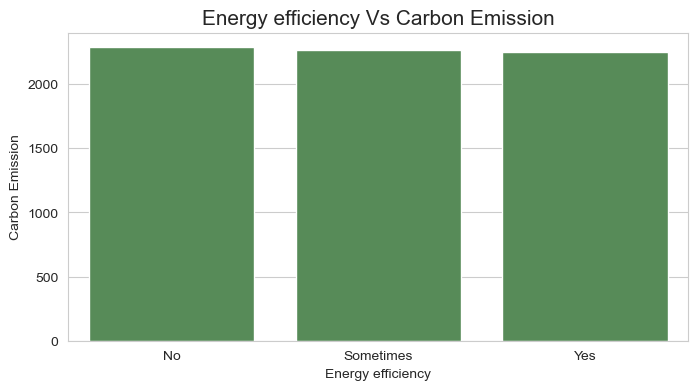

In [105]:
fig = plt.figure(figsize=(10,20))
for categorical_column in categorical_columns:
 region_cost= df.groupby(categorical_column)['CarbonEmission'].mean() 
 fig = plt.figure(figsize=(8,4))
 sns.barplot(x=region_cost.index, y=region_cost.values, color=colors_nude[-1])
 plt.title(str(categorical_column)+' Vs Carbon Emission' ,size = 15)
 plt.ylabel('Carbon Emission')
 plt.show()

From the above plots we can say :

1 -> as weight of person increase the Carbon Emission of the person also increases
    Thus we should use a ordinal encoding to encode this feature 
    
2 -> Males generally have more carbon emission then females 
    Thus we should use a ordinal encoding to encode this feature 

3 -> as meat prefernce of person increase the Carbon Emission of the person also increases
    Thus we should use a ordinal encoding to encode this feature 

4 -> as the freuency of shower of person increase the Carbon Emission of the person also increases slightly 
    Thus we should use a ordinal encoding to encode this feature or we may also drop this feature 

5 -> as  the person use a good source of energy the Carbon Emission of the person also decreases
    Thus we should use a ordinal encoding to encode this feature 

6 -> if person used personal vehcile to commute Carbon Emission of the person also increases
    Thus we should use a ordinal encoding to encode this feature 

7 -> if person uses a bad source of fuel Carbon Emission of the person also increases
    Thus we should use a ordinal encoding to encode this feature 

8 -> Social activity increases carbon emisison of person
    Thus we should use a ordinal encoding to encode this feature 

9 -> as frequecny of air travel of person increase the Carbon Emission of the person also increases
    Thus we should use a ordinal encoding to encode this feature 

10 -> as waste bag size of person increase the Carbon Emission of the person also increases
    Thus we should use a ordinal encoding to encode this feature 


11 -> as person used more eneryg effiecnt things Carbon Emission of the person also decreases slightly
    Thus we should use a ordinal encoding to encode this feature or drop this feature

Thus we can say almost all categorcial data are ordinal and this is slef explanatory as we want the perosn to knpow the carbon emission without use heavy data points and just by simple metrices




Now Let us see relationship of the leftover 2 columns 

In [62]:
# this contains the things the people recycle
list_recycling=['Paper','Metal','Glass','Plastic']
# and the columns contain what things the perons recycle from the above 4 

# this will contain how many person recycle the product
count_recycle = np.zeros(4)

# this will contain the total carbon emission of the person with sepcifc thing to recycle 
sum_carbon=np.zeros(4)
for i in range(10000):
    for j in range(4):
        if list_recycling[j] in df['Recycling'][i]:
            count_recycle[j]=count_recycle[j]+1
            sum_carbon[j]=sum_carbon[j]+df['CarbonEmission'][i]

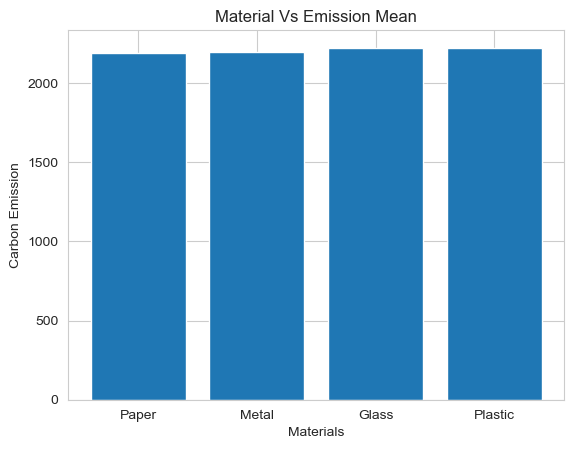

In [63]:
categories = ['Paper','Metal','Glass','Plastic']
counts = sum_carbon/count_recycle

# Create bar plot
plt.bar(categories, counts)

# Add labels and title
plt.xlabel('Materials')
plt.ylabel('Carbon Emission')
plt.title('Material Vs Emission Mean')

# Show plot
plt.show()

We can see mean carbon emission is same for all 

Thus it may not be the best idea to separate make dummies of these entires and make 0 ,1 to represnt whether the person recycle the particular item

Instead we add the total number of items person recycle and see how it goes 

In [64]:
def count_elements(string):
    # Remove the brackets and split the string by commas
    elements = string.strip("[]").split(", ")
    # Count the number of elements
    return len(elements)


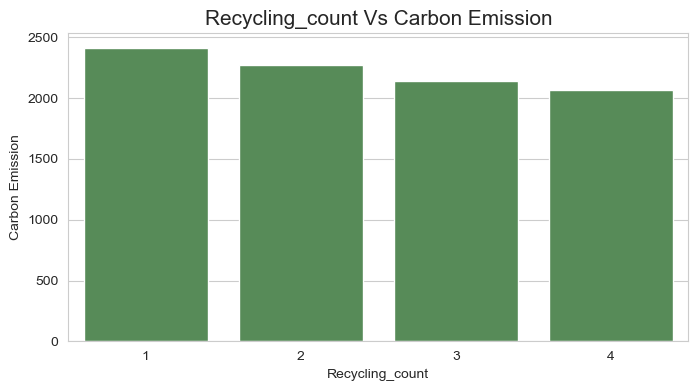

In [65]:
# as we saw that no major difference in seeing for different recycling things we see how many things the [person recycle

df['Recycling_count'] = df['Recycling'].apply(count_elements)

region_cost= df.groupby('Recycling_count')['CarbonEmission'].mean() 
fig = plt.figure(figsize=(8,4))
sns.barplot(x=region_cost.index, y=region_cost.values, color=colors_nude[-1])
plt.title('Recycling_count'+' Vs Carbon Emission' ,size = 15)
plt.ylabel('Carbon Emission')
plt.show()

Here it is not same for all 

it decreases monotonically as the number of products recycled by person increases

Thus it is good to use this instead of making dummies  

In [66]:
# this contains the things  people cook with
Cooking_With=['Microwave','Airfryer','Oven','Stove','Grill']
# this will contain how many items person use 
count_Cooking_With = np.zeros(5)
# this will contain the total carbon emission of the person with sepcifc thing 
sum_Cooking_With=np.zeros(5)
for i in range(10000):
    for j in range(5):
        if Cooking_With[j] in df['Cooking_With'][i]:
            count_Cooking_With[j]=count_Cooking_With[j]+1
            sum_Cooking_With[j]=sum_Cooking_With[j]+df['CarbonEmission'][i]

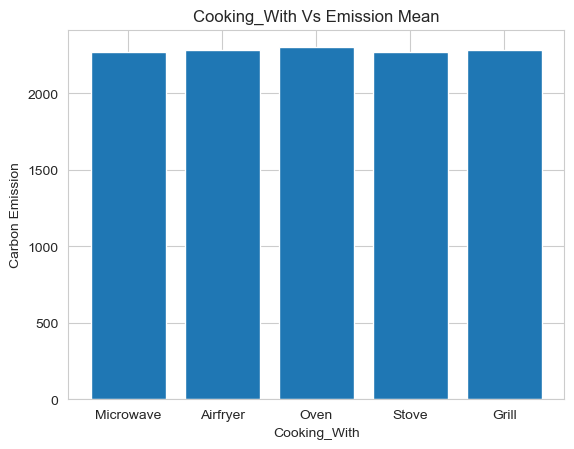

In [67]:
categories=['Microwave','Airfryer','Oven','Stove','Grill']
counts = sum_Cooking_With/count_Cooking_With

# Create bar plot
plt.bar(categories, counts)

# Add labels and title
plt.xlabel('Cooking_With')
plt.ylabel('Carbon Emission')
plt.title('Cooking_With Vs Emission Mean')

# Show plot
plt.show()

We can see mean carbon emission is same for all 

Thus it may not be the best idea to separate make dummies of these entires and make 0 ,1 to represnt whether the person used the particular item just as we saw above

Instead we add the total number of items person uses and see how it goes 

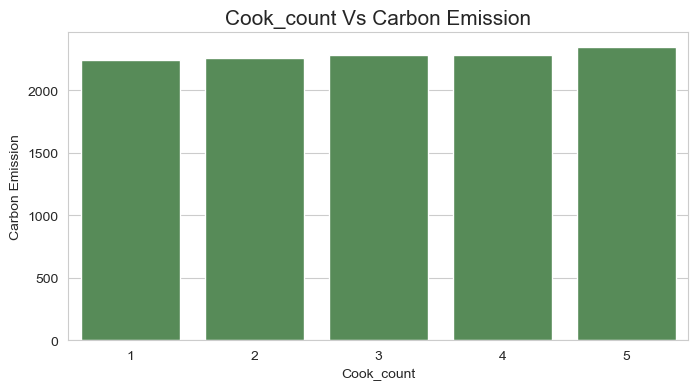

In [68]:


# as we saw that no major difference in seeing for different recycling things we see how many things the [person recycle

df['Cook_count'] = df['Cooking_With'].apply(count_elements)

region_cost= df.groupby('Cook_count')['CarbonEmission'].mean() 
fig = plt.figure(figsize=(8,4))
sns.barplot(x=region_cost.index, y=region_cost.values, color=colors_nude[-1])
plt.title('Cook_count'+' Vs Carbon Emission' ,size = 15)
plt.ylabel('Carbon Emission')
plt.show()


Here though it is not same for all 

it increase monotonically as the number of products used for cook increase

But difference is less

In [69]:
# the scatter plots not used 


So let us start  with Feature Engineering an make changes that we saw above

We have already encoded the 2 columns for Recycling and Cook item
We just drop the 2 orihinal columns

In [70]:
df.drop(columns = ['Recycling', 'Cooking_With'], axis = 1 , inplace = True)

This df is our cleaned df after filling null values, removing duplicates(if any) and outlier if required.

Now let us encode the categorical columns we abopve saw with ordinal encoding 

In [71]:
def ordinal_encode_df(dff, order=None):
    mapping = {}
    encoded_df = pd.DataFrame()
    
    # we will use our own order to encode 
    for col in dff.columns:
        if order and col in order:
            unique_categories = order[col]
            category_mapping = {category: idx for idx, category in enumerate(unique_categories)}
            mapping[col] = category_mapping
            encoded_df[col] = dff[col].map(category_mapping)
        else:
            encoded_df[col] = dff[col]

            
        # category_mapping = {category: idx for idx, category in enumerate(unique_categories)}
        # mapping[col] = category_mapping
        # encoded_df[col] = dff[col].map(category_mapping)
    
    return encoded_df, mapping

In [72]:
orders = {
    'Body Type': {'overweight': 2, 'obese':3, 'underweight': 0, 'normal': 1},
'Sex': {'female': 0, 'male': 1}, 
'Diet': {'pescatarian': 0, 'vegetarian': 1, 'omnivore': 2, 'vegan': 3},
'How Often Shower': {'daily': 1, 'less frequently': 0, 'more frequently': 3, 'twice a day': 2},
'Heating Energy Source': {'coal':3, 'natural gas': 1, 'wood': 2, 'electricity': 0},
'Transport': {'public': 1, 'walk/bicycle': 0, 'private': 2},
'Vehicle Type': { 'No Vehicle': 0, 'petrol': 5, 'diesel': 4, 'hybrid': 3, 'lpg': 2, 'electric': 1},
'Social Activity': {'often': 2, 'never': 0, 'sometimes': 1},
'Frequency of Traveling by Air': {'frequently': 2, 'rarely': 1, 'never': 0, 'very frequently': 3},
'Waste Bag Size': {'large': 2, 'extra large': 3, 'small': 0, 'medium': 1},
'Energy efficiency': {'No': 2, 'Sometimes': 1, 'Yes': 0}
}

# df_encoded = df.copy()

df_encoded, mapping = ordinal_encode_df(df, order=orders)



In [73]:
df_encoded.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,CarbonEmission,Recycling_count,Cook_count
0,0,0,0,0,0,0,0.0,0,180,0,191,0,3,7,26,1,0,1505,0,1
1,1,0,1,1,1,1,0.0,0,64,1,9,1,2,9,38,5,0,1162,0,1
2,0,1,2,2,2,2,1.0,1,88,2,1839,2,0,14,47,6,1,1856,0,1
3,0,1,2,3,2,1,0.0,2,107,1,74,3,2,20,5,7,1,360,3,2
4,1,0,1,0,0,2,2.0,0,216,3,3537,0,0,3,5,6,2,3234,0,0


Now we encode the data in all numerical so let use see the corelation

In [74]:
df_encoded.corr()


,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,CarbonEmission,Recycling_count,Cook_count
Body Type,1.000000,-0.017946,0.007233,-0.008306,-0.005385,0.007692,0.002351,-0.007183,0.023085,-0.002316,-0.007505,0.007036,0.002436,0.004825,-0.000738,-0.008849,-0.014261,-0.132589,-0.007910,-0.000876
Sex,-0.017946,1.000000,0.007207,-0.013714,-0.001506,-0.003086,-0.003538,0.000485,0.015877,0.008723,-0.005310,0.018907,-0.001390,0.006698,0.001684,0.001834,0.011025,0.164158,-0.002670,-0.012198
Diet,0.007233,0.007207,1.000000,0.004842,-0.009402,0.004878,0.011658,0.023992,-0.016954,0.006707,0.017653,0.002540,0.005043,0.010185,0.003887,-0.002914,-0.003951,0.009689,0.015728,0.015438
How Often Shower,-0.008306,-0.013714,0.004842,1.000000,0.000062,0.003558,0.008991,0.020137,0.013727,0.006027,0.022634,0.002977,0.009326,-0.005151,0.014260,0.006073,0.007717,0.028011,0.028620,0.004718
Heating Energy Source,-0.005385,-0.001506,-0.009402,0.000062,1.000000,-0.010795,-0.008227,0.022467,0.000248,-0.012783,-0.004663,-0.006046,0.003034,0.008006,0.007085,-0.013326,0.006828,-0.158278,0.025510,-0.001296
Transport,0.007692,-0.003086,0.004878,0.003558,-0.010795,1.000000,0.749882,0.003636,-0.006164,-0.002577,0.542835,0.007899,-0.015966,0.000626,-0.000372,0.002463,0.016041,0.391710,-0.014508,0.000366
Vehicle Type,0.002351,-0.003538,0.011658,0.008991,-0.008227,0.749882,1.000000,0.010870,-0.004022,-0.007590,0.692771,0.007204,-0.011637,-0.007234,0.004559,0.001713,0.023324,0.283151,-0.021462,-0.001348
Social Activity,-0.007183,0.000485,0.023992,0.020137,0.022467,0.003636,0.010870,1.000000,0.004384,-0.002842,0.005400,-0.003435,0.011452,0.003832,0.012474,0.009327,0.025959,-0.036669,0.012569,0.008301
Monthly Grocery Bill,0.023085,0.015877,-0.016954,0.013727,0.000248,-0.006164,-0.004022,0.004384,1.000000,-0.008655,0.016085,-0.009834,0.002343,-0.010318,0.006746,0.012798,0.018164,0.087433,-0.002930,0.023486
Frequency of Traveling by Air,-0.002316,0.008723,0.006707,0.006027,-0.012783,-0.002577,-0.007590,-0.002842,-0.008655,1.000000,-0.009466,0.005227,-0.013743,0.008840,-0.004194,-0.017180,0.005433,0.205902,0.005579,-0.001321


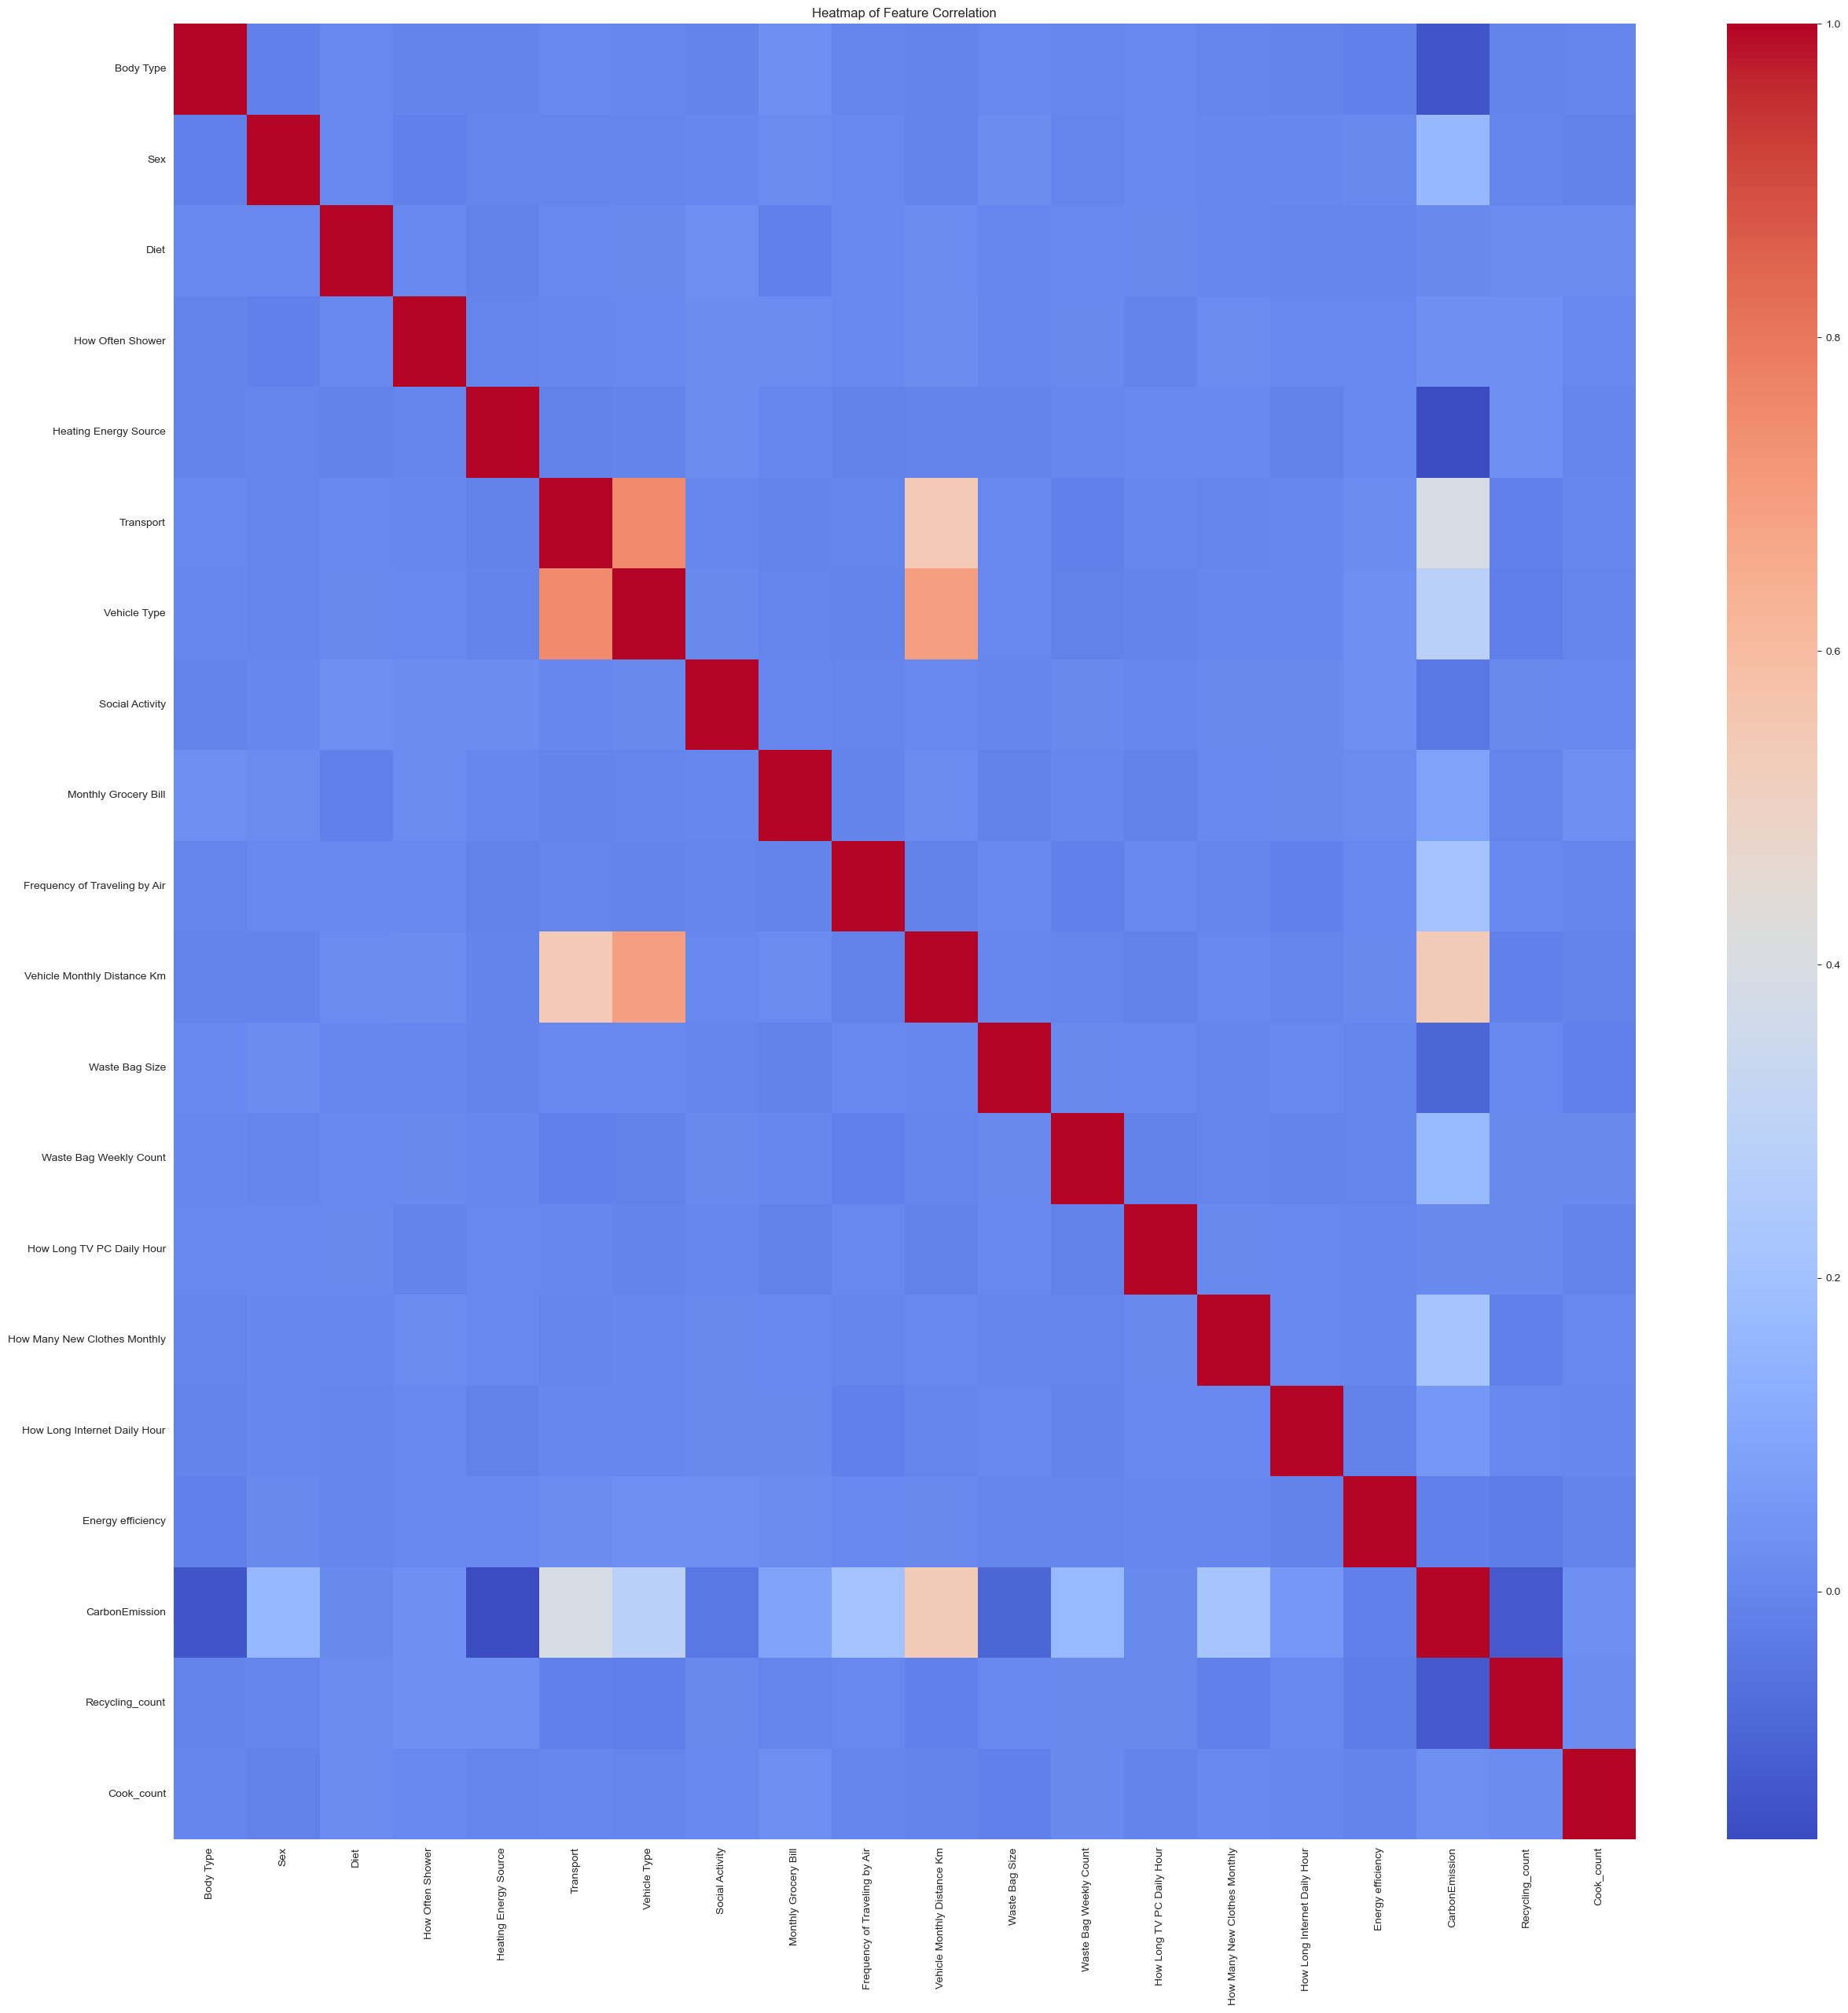

In [75]:
# Calculate correlations
corr = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr, cmap='coolwarm')

plt.title('Heatmap of Feature Correlation')
plt.show()

We can see that Vehicle distance depends on Vehicle type and and transport

Also We can see more corelation of featiures with Carbon emision

In [76]:
df_encoded.describe()


,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,CarbonEmission,Recycling_count,Cook_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,1.499900,0.499300,1.493200,1.493700,1.50440,0.99850,0.996000,0.995600,123.875200,1.501500,1119.424700,1.497200,3.024600,12.139200,25.109000,11.889100,1.009500,1465.330000,1.067500,1.57510
std,1.114506,0.500025,1.122622,1.123604,1.12477,0.81078,1.640809,0.812063,72.234018,1.123799,1197.077133,1.115848,1.990375,7.106369,14.698725,7.277218,0.808502,833.625875,0.901124,1.22111
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,61.000000,0.000000,69.000000,0.000000,1.000000,6.000000,13.000000,6.000000,0.000000,812.000000,0.000000,1.00000
50%,2.000000,0.000000,1.000000,1.000000,2.00000,1.00000,0.000000,1.000000,123.000000,1.000000,708.500000,1.000000,3.000000,12.000000,25.000000,12.000000,1.000000,1348.000000,1.000000,2.00000
75%,2.000000,1.000000,2.000000,3.000000,3.00000,2.00000,2.000000,2.000000,187.000000,3.000000,1850.250000,2.000000,5.000000,18.000000,38.000000,18.000000,2.000000,2019.000000,2.000000,3.00000
max,3.000000,1.000000,3.000000,3.000000,3.00000,2.00000,5.000000,2.000000,249.000000,3.000000,4002.000000,3.000000,6.000000,24.000000,50.000000,24.000000,2.000000,3508.000000,3.000000,4.00000


almost for every feature mean is min + max by 2 thus good data distibution
except vehcile type as 0 for many  and air freq, vehcule monthly km and thus carbon emission is not mean , 
cook count and recycle also not folllow this 

In [77]:

df_encoded.corr()['CarbonEmission']  


Body Type                       -0.132589
Sex                              0.164158
Diet                             0.009689
How Often Shower                 0.028011
Heating Energy Source           -0.158278
Transport                        0.391710
Vehicle Type                     0.283151
Social Activity                 -0.036669
Monthly Grocery Bill             0.087433
Frequency of Traveling by Air    0.205902
Vehicle Monthly Distance Km      0.534153
Waste Bag Size                  -0.089467
Waste Bag Weekly Count           0.169652
How Long TV PC Daily Hour        0.011311
How Many New Clothes Monthly     0.214488
How Long Internet Daily Hour     0.050386
Energy efficiency               -0.015314
CarbonEmission                   1.000000
Recycling_count                 -0.119650
Cook_count                       0.023690
Name: CarbonEmission, dtype: float64

as corelation for some feature is very less thus we can remove how often shower ,social activity(diffcilut otjudege) , how long pc , how long intenrt , neergy effieicent, cook count in linear models

In [78]:
# # removing column whose correlation with 'Carbon emmision' is very low for linear models 
# df_encoded=df_encoded.drop(columns=['How Long TV PC Daily Hour','How Long Internet Daily Hour', 'How Often Shower', 'Social Activity',  'Cook_count', 'Energy efficiency'])

# df_normlaised['total_hrs_on_gadgets']=df_normlaised['How Long TV PC Daily Hour']+df['How Long Internet Daily Hour']
# df_normlaised=df_normlaised.drop(columns=['How Long TV PC Daily Hour','How Long Internet Daily Hour'])


In [79]:



# Manually encode categorical columns
def normalise_data(df, columns):
   for col in columns:
      # Find the maximum value in the column
      diff = df[col].max() - df[col].min()
      
      # Divide each value in the column by its maximum value
      df[col] = df[col] / diff
   
   return df


In [80]:

# normalization
columns_to_normlaise = ['Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 'Waste Bag Weekly Count',
                     'How Many New Clothes Monthly', 'How Long TV PC Daily Hour','How Long Internet Daily Hour']  # Add your column names here

df_normlaised = normalise_data(df_encoded, columns_to_normlaise)

In [81]:
# moving CarbonEmission column at last

# Extract the column
column_to_move = df_normlaised.pop('CarbonEmission')

# Re-insert the column at the last position
df_normlaised['CarbonEmission'] = column_to_move

In [82]:
df_normlaised

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling_count,Cook_count,CarbonEmission
0,0,0,0,0,0,0,0.0,0,0.722892,0,0.047726,0,0.500000,0.291667,0.52,0.041667,0,0,1,1505
1,1,0,1,1,1,1,0.0,0,0.257028,1,0.002249,1,0.333333,0.375000,0.76,0.208333,0,0,1,1162
2,0,1,2,2,2,2,1.0,1,0.353414,2,0.459520,2,0.000000,0.583333,0.94,0.250000,1,0,1,1856
3,0,1,2,3,2,1,0.0,2,0.429719,1,0.018491,3,0.333333,0.833333,0.10,0.291667,1,3,2,360
4,1,0,1,0,0,2,2.0,0,0.867470,3,0.883808,0,0.000000,0.125000,0.10,0.250000,2,0,0,3234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,2,3,0,2,3.0,2,0.722892,2,0.058221,3,0.666667,0.500000,0.54,0.375000,2,0,0,1672
9996,3,0,3,3,0,2,4.0,1,0.738956,0,0.658671,1,0.333333,0.583333,0.16,1.000000,1,1,1,2302
9997,0,0,1,0,3,1,0.0,2,0.995984,3,0.023988,1,0.666667,0.458333,0.10,1.000000,2,2,2,1641
9998,2,1,3,2,0,2,1.0,0,0.518072,1,0.898301,3,0.666667,0.791667,0.28,0.208333,1,1,3,3178


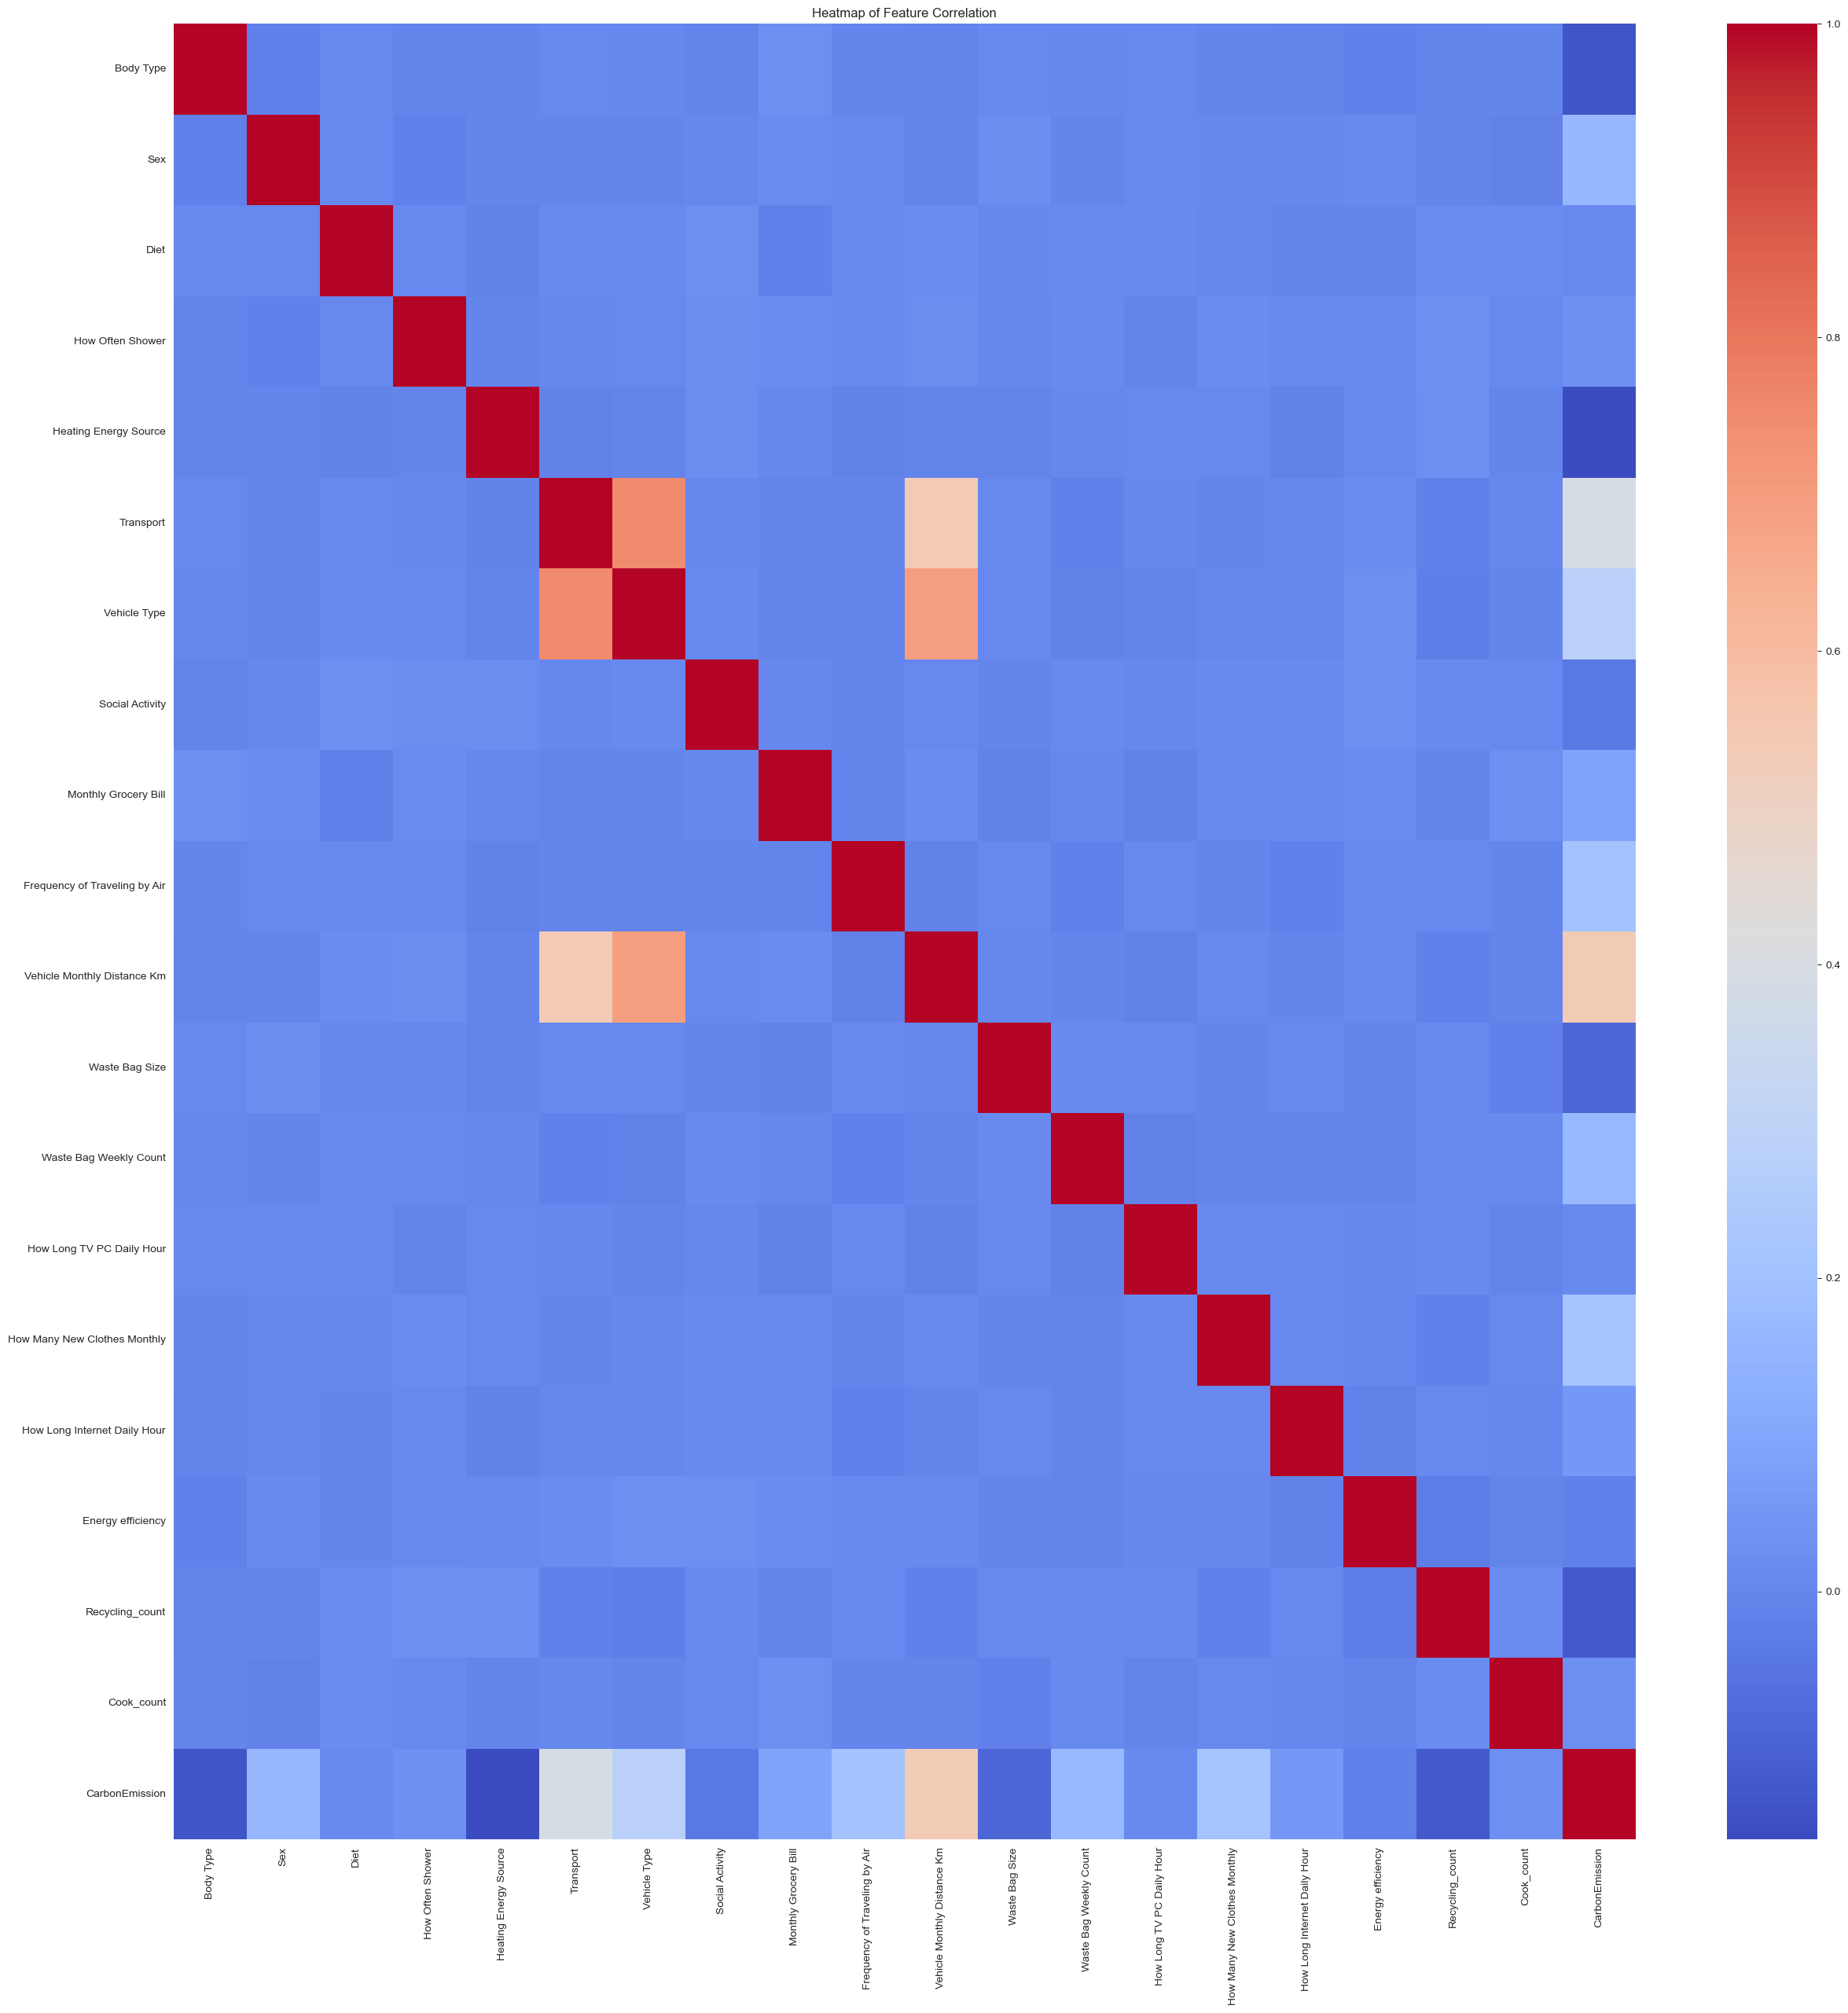

In [83]:
# Calculate correlations
corr = df_normlaised.corr()

# Create a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr, cmap='coolwarm')

plt.title('Heatmap of Feature Correlation')
plt.show()

In [84]:
df_normlaised.corr()['CarbonEmission']

Body Type                       -0.132589
Sex                              0.164158
Diet                             0.009689
How Often Shower                 0.028011
Heating Energy Source           -0.158278
Transport                        0.391710
Vehicle Type                     0.283151
Social Activity                 -0.036669
Monthly Grocery Bill             0.087433
Frequency of Traveling by Air    0.205902
Vehicle Monthly Distance Km      0.534153
Waste Bag Size                  -0.089467
Waste Bag Weekly Count           0.169652
How Long TV PC Daily Hour        0.011311
How Many New Clothes Monthly     0.214488
How Long Internet Daily Hour     0.050386
Energy efficiency               -0.015314
Recycling_count                 -0.119650
Cook_count                       0.023690
CarbonEmission                   1.000000
Name: CarbonEmission, dtype: float64

# Important Functions

In [85]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    
 
    # Check if random_state is provided
    if random_state is not None:
        np.random.seed(random_state)
    
    # Shuffle indices
    indices = np.random.permutation(len(X))
    
    # Calculate the number of samples in the test set
    test_samples = int(len(X) * test_size)
    
    # Split indices into train and test sets
    test_indices = indices[:test_samples]
    train_indices = indices[test_samples:]
    
    # Split the data into train and test sets based on indices
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test


In [86]:
def mean_absolute_error(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

def mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

def r_squared(y_true, y_pred):
    y_bar = np.mean(y_true)
    ss_total = np.sum((y_true - y_bar) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared


# Linear Regeression

The equation to calculate the coefficients (β) for linear regression is given by:

β = (X^T X)^(-1) X^T y

In [87]:
class Linear_regression:
    def __init__(self):
        # Initialize coefficients and intercept to None
        self.coef = None
        self.intercept = None
    
    def fit(self, X_train, y_train):
        # Insert a column of ones at the beginning of the feature matrix
        X_train = np.insert(X_train, 0, 1, axis=1)
        
        # Calculate the coefficients using the closed-form solution
        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
        
        # Assign the intercept and coefficients to class attributes
        self.intercept = betas[0]
        self.coef = betas[1:]
    
    def predict(self, X_test):
        # Make predictions using the trained model
        y_pred = np.dot(X_test, self.coef) + self.intercept
        return y_pred


## Applying Linear Regression without doing feature engineering


In [88]:
df

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,CarbonEmission,Recycling_count,Cook_count
0,overweight,female,pescatarian,daily,coal,public,No Vehicle,often,230,frequently,210,large,4,7,26,1,No,2238,1,2
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,No Vehicle,often,114,rarely,9,extra large,3,9,38,5,No,1892,1,2
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,2595,1,2
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,No Vehicle,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,1074,4,3
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,4743,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obese,male,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,268,medium,5,12,27,9,Yes,2408,1,1
9996,normal,female,vegan,twice a day,coal,private,lpg,never,234,frequently,5316,extra large,3,14,8,24,Sometimes,3084,2,2
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,No Vehicle,sometimes,298,very frequently,96,extra large,5,11,5,24,Yes,2377,3,3
9998,underweight,male,vegan,more frequently,coal,private,petrol,often,179,rarely,8688,medium,5,19,14,5,Sometimes,4574,2,4


In [89]:
numeric_columns = df.select_dtypes(exclude=['object'])

numeric_columns = numeric_columns.drop(columns=['Recycling_count', 'Cook_count'], axis = 1)


In [90]:
numeric_columns

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
0,230,210,4,7,26,1,2238
1,114,9,3,9,38,5,1892
2,138,2472,1,14,47,6,2595
3,157,74,3,20,5,7,1074
4,266,8457,1,3,5,6,4743
...,...,...,...,...,...,...,...
9995,230,268,5,12,27,9,2408
9996,234,5316,3,14,8,24,3084
9997,298,96,5,11,5,24,2377
9998,179,8688,5,19,14,5,4574


In [91]:
X=numeric_columns.iloc[:,0:5].values

In [92]:
X

array([[ 230,  210,    4,    7,   26],
       [ 114,    9,    3,    9,   38],
       [ 138, 2472,    1,   14,   47],
       ...,
       [ 298,   96,    5,   11,    5],
       [ 179, 8688,    5,   19,   14],
       [ 115, 9952,    4,   11,    6]])

In [93]:
Y=numeric_columns.iloc[:,-1].values


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, 0.2,10)

In [95]:


linearregression = Linear_regression()


# Fit the models
linearregression.fit(X_train, y_train)

# Make predictions
y_pred = linearregression.predict(X_test)

In [96]:
# Assuming y_true contains the true target values and y_pred contains the predicted values
# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute Root Mean Squared Error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred)

# Compute R-squared (R²)
r2_squared = r_squared(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r2_squared)

Mean Absolute Error: 606.1940481064249
Mean Squared Error: 597623.0290773183
Root Mean Squared Error: 773.0608184854011
R-squared (R²): 0.4122501430464647


## Linear Regression after feature engineering (converting all categorical column to numerical column)

In [97]:
df_encoded.shape

(10000, 20)

In [98]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_encoded.iloc[:,0:18].values,df_encoded.iloc[:,-1].values, 0.2,10)


In [99]:


linearregression = Linear_regression()


# Fit the models
linearregression.fit(X_train1, y_train1)

# Make predictions
y_pred1 = linearregression.predict(X_test1)

In [100]:
# Assuming y_true contains the true target values and y_pred contains the predicted values
# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test1, y_pred1)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test1, y_pred1)

# Compute Root Mean Squared Error (RMSE)
rmse = root_mean_squared_error(y_test1, y_pred1)

# Compute R-squared (R²)
r2_squared = r_squared(y_test1, y_pred1)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r2_squared)

Mean Absolute Error: 444.6818998678045
Mean Squared Error: 281435.00806897157
Root Mean Squared Error: 530.5044844946851
R-squared (R²): 0.5903597901553821


## On Normalised Dataset

In [101]:
df_normlaised.shape

(10000, 20)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df_normlaised.iloc[:,0:18].values,df_normlaised.iloc[:,-1].values, 0.2,10)


In [103]:


linearregression = Linear_regression()


# Fit the models
linearregression.fit(X_train, y_train)

# Make predictions
y_pred = linearregression.predict(X_test)



In [104]:
# Assuming y_true contains the true target values and y_pred contains the predicted values
# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute Root Mean Squared Error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred)

# Compute R-squared (R²)
r2_squared = r_squared(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r2_squared)

Mean Absolute Error: 444.6818998678045
Mean Squared Error: 281435.00806897157
Root Mean Squared Error: 530.5044844946851
R-squared (R²): 0.5903597901553821
